In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import itertools

from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc, recall_score, precision_score, precision_recall_curve, make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, ParameterGrid, StratifiedKFold, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer

# from pyearth import Earth

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
combined_data = pd.concat([train, test], axis=0)
X = combined_data.drop(['y', 'id'], axis=1)
X.reset_index(inplace=True)
y_train = train['y']

/var/folders/s3/_qwxl0r151sdz0mvxwd477d40000gn/T/ipykernel_43392/3776856981.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X.reset_index(inplace=True)


In [5]:
# Impute NAs
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(X)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)
X = X.fillna(imputed_df)

In [19]:
# Split X using original indices
train_indx = range(len(train))
test_indx = range(len(train), len(train)+len(test))
X_train = X.loc[train_indx, :].drop('index', axis=1)
X_test = X.loc[test_indx, :].drop('index', axis=1)

In [20]:
# remove duplicate columns
X_train_dup = X_train.T.drop_duplicates().T
dup_cols = set(X_train.columns) - set(X_train_dup.columns)
X_train = X_train_dup
X_test = X_test.drop(dup_cols, axis=1)

In [21]:
# scale features
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [22]:
# remove zero variance columns
selector = VarianceThreshold(threshold = 0.1)
selector.fit(X_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

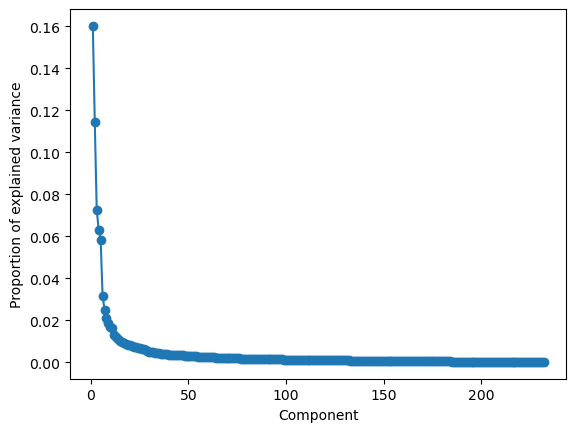

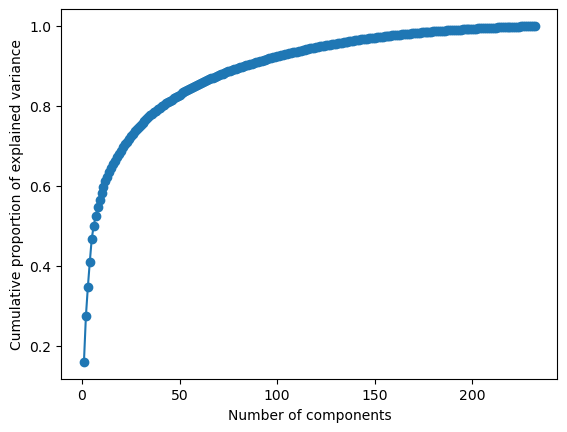

Number of components that explain 95% of variance: 124


In [16]:
# PCA
pca = PCA(n_components=None)
pca.fit(X_train)

# Generate scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component')
plt.ylabel('Proportion of explained variance')
plt.show()

# Generate explained variance ratio plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative proportion of explained variance')
plt.show()

# Choose the number of components that explains a large proportion of variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_var >= 0.95) + 1
print(f"Number of components that explain 95% of variance: {n_components}")


pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
np.shape(X_train_)

In [23]:
# Elastic Net
clf = ElasticNetCV(cv=5, max_iter = 100000, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

# Calculate the RMSE on the training set
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# Print the RMSE1
print("RMSE on training set:", rmse)

RMSE on training set: 9.282638437720053


In [17]:
# Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Instantiate the random forest regressor
rf = RandomForestRegressor(random_state=0)

# Create a GridSearchCV object and fit it on training data
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding RMSE score
print("Best hyperparameters:", grid_search.best_params_)
print("Best RMSE score:", np.sqrt(-grid_search.best_score_))

Best hyperparameters: {'max_depth': 7, 'n_estimators': 50}
Best RMSE score: 10.825086701912426


In [ ]:
y_pred_test = clf.predict(X_test)

In [ ]:
pred = pd.DataFrame([test.id, y_pred_test])
pred = pred.transpose()
pred['id'] = pred['id'].astype('int32')
pred.rename(columns = {'Unnamed 0':'y'}, inplace = True)
pred

In [ ]:
pred.to_csv('pred.csv', index=False)

# Feature engineering

#### Ideas for what we can do:
- how to manipulate null data
- outliers
- look at different predictors, only use the ones that are helpful (density map?)


#### Feature Engineering Techniques for Machine Learning
1) Imputation

2) Discretization

3) Categorical Encoding

4) Feature Splitting

5) Handling Outliers

6) Variable Transformations

7) Scaling 

8) Creating Features

#### Clustering, PCA (reduces dataset but maintaining the same amount of information)

#### Outliers: DBScan

#### Scale data

#### Interaction features (if the interactions merge)

#### Imputation null data 

#### Group by quartiles (numerical values)

### 1 )Drop null data

Ideas? What can we do with null data:
1. Fill with 0
2. Take them out

In [ ]:
for i in range(train.shape[1]):
    print(train.columns[i], train.iloc[:,i].isna().sum())

In [ ]:
train = train.fillna(0)

In [ ]:
test = test.fillna(0)

In [ ]:
X = train.drop(columns = ['y'], axis = 1)
y = train['y']

In [ ]:
X

In [ ]:
sns.heatmap(X.corr())

In [ ]:
## lower score after I try to scale
sc = StandardScaler()

sc.fit(X)

X = sc.transform(X)
test = sc.transform(test)

## 1) Simple linear regression with all predictors

In [ ]:
# Simple linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit the model
lr = LinearRegression()
lr.fit(X, y)

In [ ]:
ypred = lr.predict(test)

## 2) Lasso --> alpha = 0.1, score = 9.07334 (best so far) 

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.1)
reg.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model
ypred = reg.predict(X_test_scaled)

In [ ]:
pred = pd.DataFrame([test_copy.id, ypred])
pred = pred.transpose()
pred['id'] = pred['id'].astype('int32')
pred.rename(columns = {'Unnamed 0':'y'}, inplace = True)
pred

In [ ]:
pred.to_csv('pred.csv', index = False)


## 2) MARS with max_df = 4 (my last year model)

In [ ]:
#K-fold cross validation to find optimal degree for MARS
start_time = time.time()

cv_score = {}
for df in range(1,10):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    model = Earth(max_terms = 500, max_degree = df, allow_missing = True)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    cv_score[df] = np.mean(-scores)
    
sns.lineplot(np.arange(1,10),list(cv_score.values()))
plt.plot(min(cv_score, key=lambda k: cv_score[k]),min(list(cv_score.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best value of df')
plt.xlabel('Degrees of Freedom')
plt.ylabel('CV ERROR')
plt.legend()

print("Time taken = ", (time.time()-start_time)/60, " minutes")